Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Villamor, Kurt Russel A.
**Section** | CPE32S3
**Date Performed**: | 02-21-25
**Date Submitted**: | 02-21-25
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to allow students to perform face detection on still images and videos using Haar cascades.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize OpenCV to detect faces in still images and videos.
* Demonstrate the use of Haar-like features for detection of other human features.

## 3. Procedures and Outputs

Contrary to initial assumptions, conducting face detection on a static image and a video stream shares a remarkable similarity. Essentially, the latter is merely a sequential rendition of the former: when detecting faces in videos, it essentially involves applying face detection to every individual frame obtained from the camera feed. Of course, video face detection introduces additional elements like tracking, which aren't relevant to static images. Nevertheless, it's valuable to recognize that the fundamental principles behind both processes remain consistent.

### Performing face detection on still image

The first and most basic way to perform face detection is to load an image and detect faces in it. To make the result visually meaningful, we will draw rectangles around faces on the original image.

**Before implementing the code below**, check the contents of the `cv2.CascadeClassifier()` function. Provide an explanation of the function, its parameters before running the code below.

- **cv2.CascadeClassifier() loads the classifier file, for this example the haar cascade in a xml file. This allows you to access algorithm that is prebuilt to the xml file.**

In [9]:
# Make sure that for this activity, you have downloaded the
# file indicated below from the resource linked in the instructional materials
# in the module.

import cv2
from google.colab.patches import cv2_imshow

picPath = '/content/breakingbad.jpg'
haarPath = '/content/haarcascade_frontalface_default.xml'

def faceDetect(picPath):
  face_cascade = cv2.CascadeClassifier(haarPath)

  img = cv2.imread(picPath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

  cv2_imshow(img)

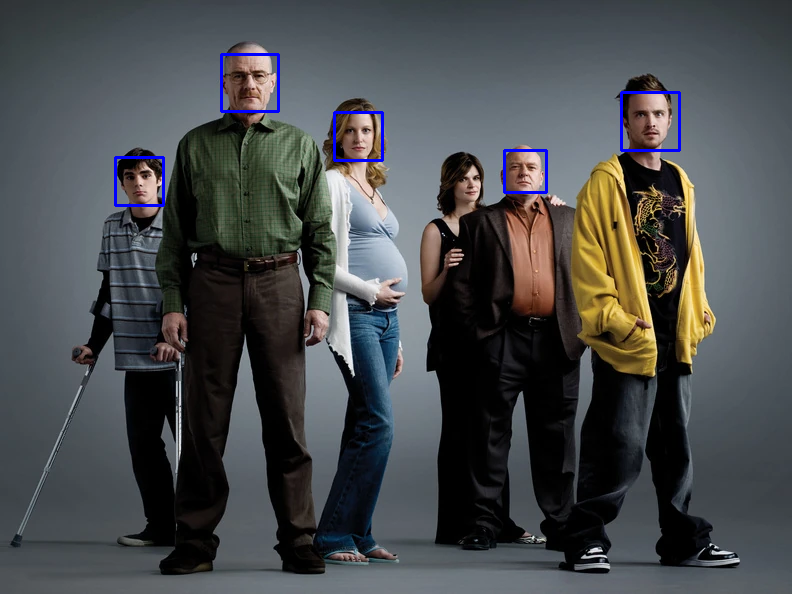

In [10]:
faceDetect(picPath)

**Analysis**:
- Based on your earlier analysis, where do you think the face detection works in the line of code above?
- Provide an analysis of the parameters of the `detectMultiScale` method.
- Change the color of the border of the detected faces to red.
- Are you able to make the borders thicker? Demonstrate.

- (Based on your earlier analysis, where do you think the face detection works in the line of code above?) **using xml file, you will be able to use the detectMultiscale method in  the face default xml. The process is, you read the image and that data will be fed to the face.detectmultiscale to find the face in the image with the use of Haar cascade face. then once it was located, the rectagle shape will be draw as an shape which enclose the part of interest**

- (Provide an analysis of the parameters of the detectMultiScale method.) **detectMultipleScale has a 7 parameters namely; *images* which accepts the image, *objects* accepts the Vector of rectangles where each rectangle contains the detected object, *scaleFactor* to manipulate the scale of the picture, Neighbors, the min and Max size and the Flags**

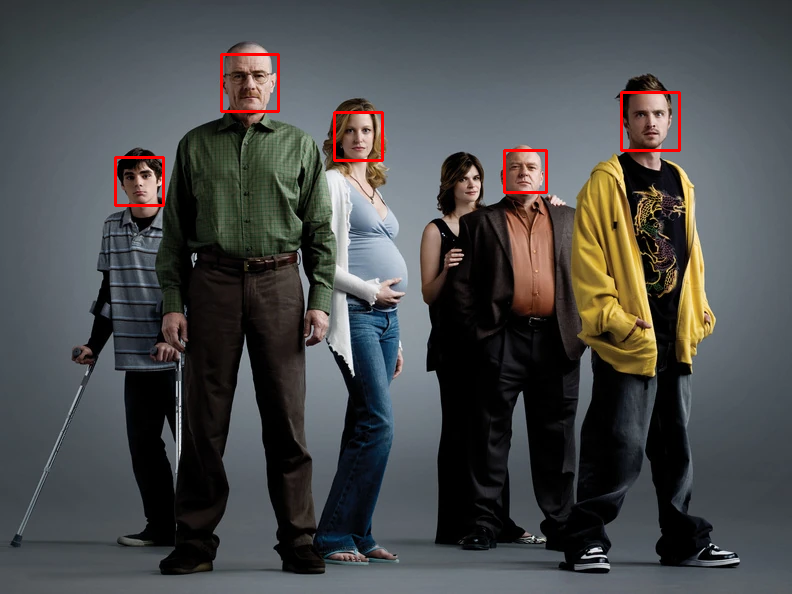

In [13]:
# Change the color of the border of the detected faces to red
def redfaceDetect(picPath):
  face_cascade = cv2.CascadeClassifier(haarPath)

  img = cv2.imread(picPath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255), 2)

  cv2_imshow(img)

redfaceDetect('breakingbad.jpg')

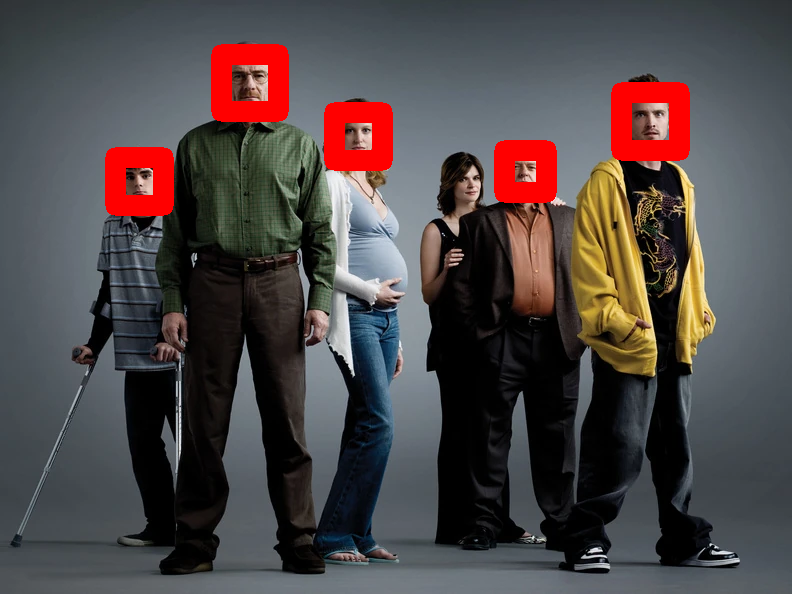

In [18]:
# Are you able to make the borders thicker? Demonstrate
def thickfaceDetect(picPath):
  face_cascade = cv2.CascadeClassifier(haarPath)

  img = cv2.imread(picPath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255), 20)

  cv2_imshow(img)

thickfaceDetect('breakingbad.jpg')

### Performing face detection on video

**Step 1**: Create a file called face_detection.py and include the following codes.

In [ ]:
import cv2

**Step 2:** After this, we declare a method, `detect()`, which will perform face detection.

In [ ]:
def detect():
  face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
  camera = cv2.VideoCapture(0)

**Step 3:** The first thing we need to do inside the detect() method is to load the Haar cascade files so that OpenCV can operate face detection. As we copied
the cascade files in the local `cascades/` folder, we can use a relative path. Then, we open a VideoCapture object (the camera feed). The VideoCapture  constructor takes a parameter, which indicates the camera to be used; zero indicates the first camera available.

In [ ]:
  while (True):
    ret, frame = camera.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

**Step 4:** Next up, we capture a frame. The read() method returns two values: a Boolean indicating the success of the frame read operation, and the frame
itself. We capture the frame, and then we convert it to grayscale. This is a necessary operation, because face detection in OpenCV happens in the grayscale color space:

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

**Step 5:** Much like the single still image example, we call detectMultiScale on the grayscale version of the frame.

In [ ]:
  for (x,y,w,h) in faces:
    img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.03,
    5, 0, (40,40))

**Step 6:** Here we have a further step compared to the still image example: we create a region of interest corresponding to the face rectangle, and within this rectangle, we operate "eye detection". This makes sense as you wouldn't want to go looking for eyes outside a face (well, for human beings at least!).

In [ ]:
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),
    (0,255,0),2)

**Step 7:** Again, we loop through the resulting eye tuples and draw green rectangles around them.

In [ ]:

    cv2.imshow("camera", frame)
    if cv2.waitKey(1000 / 12) & 0xff == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
detect()

**Provide the following**:
- Screenshot of the output for the working code once you've put it all together.
- Summary of the steps you've performed along with observations.

## Screenshot
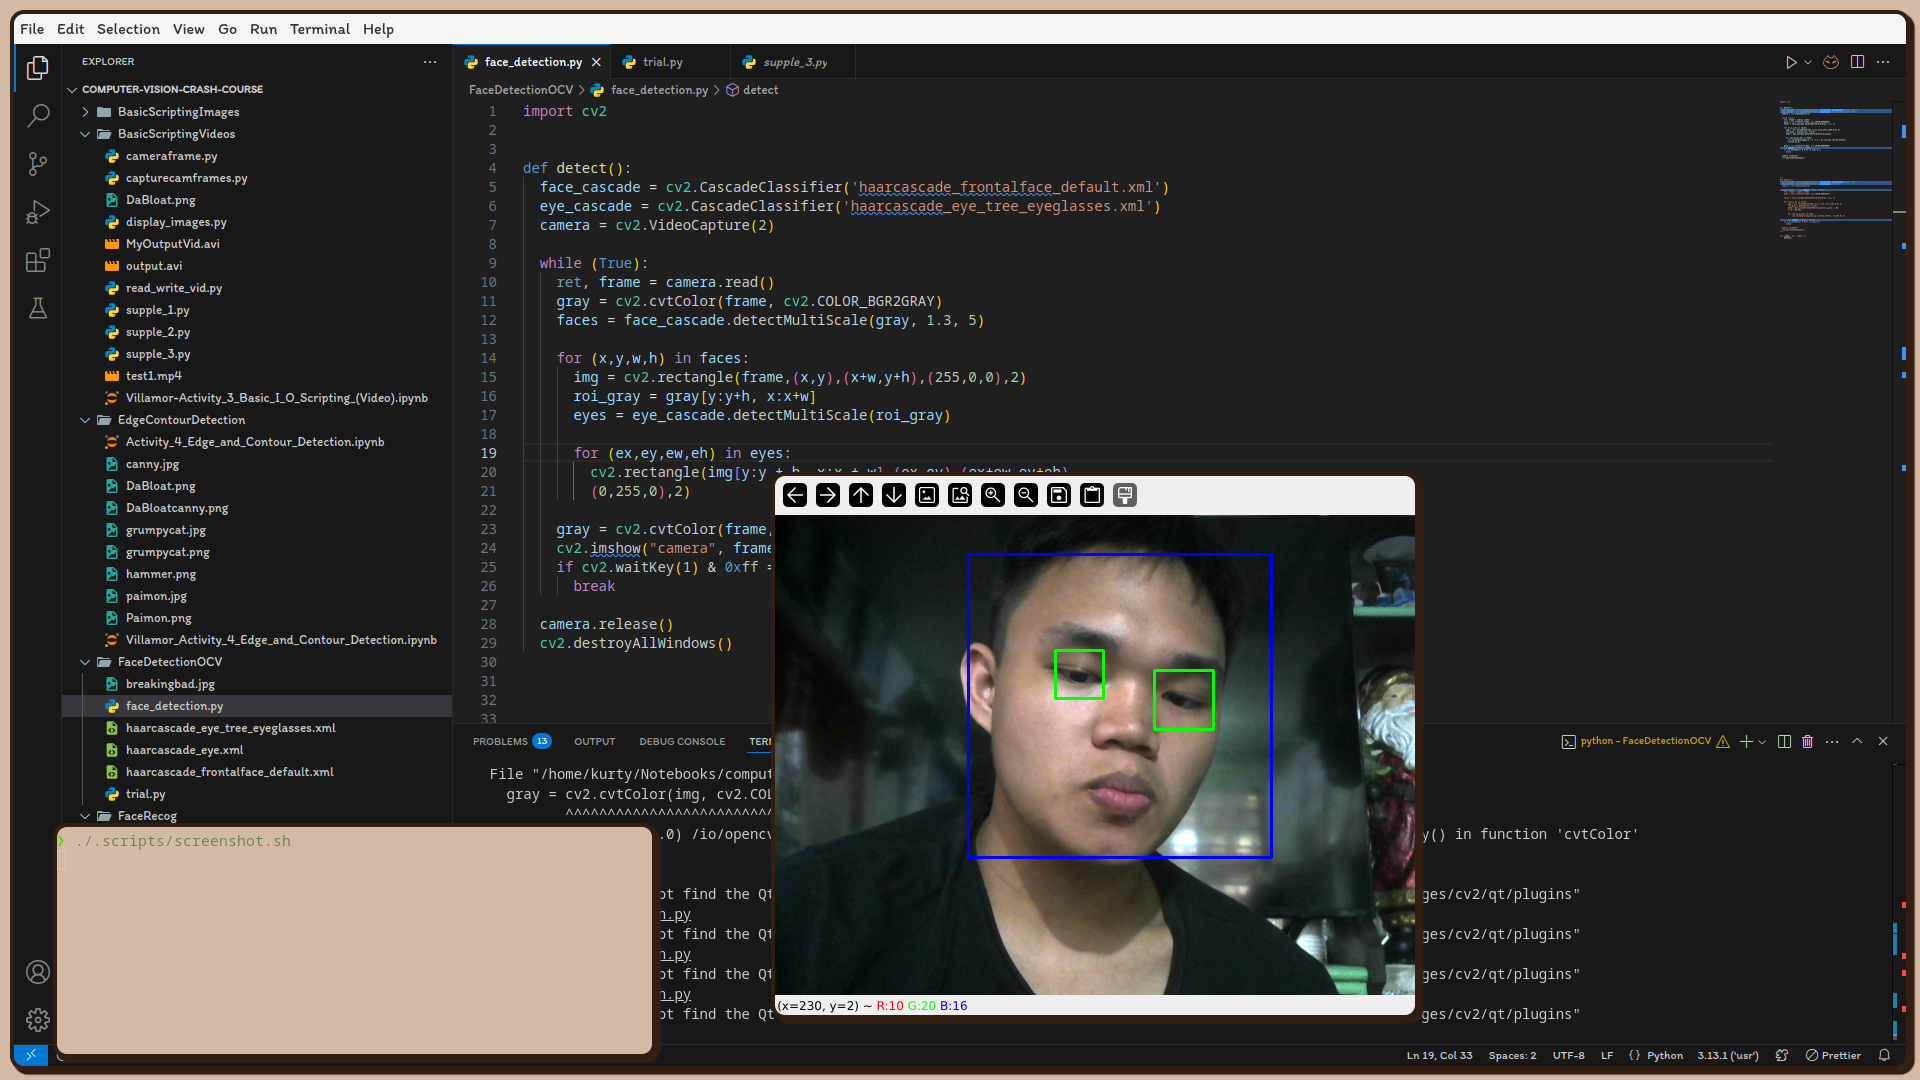

- as for the face and eye detection in a video feed, the frame are check one by one thus making the video slow and somtimes laggy. The video is cut to a frame and the frame is transform to a graysclae image. This graysacle image is the one that is fed to the face haar cascade classifier. If the face is successfully identified, the face will be cropped and it will be fed to find the eyes using the eye classfier ad this is measured by their position. with there positions acquired, the program will draw a rectangle to enclose it

## 4. Supplementary Activity

In your Cameo project, include real-time face detection using Haar cascade. Show screenshots of the working demonstration for this supplementary activity.

Additionally, implement similar steps to detect a smile using Haar cascades.

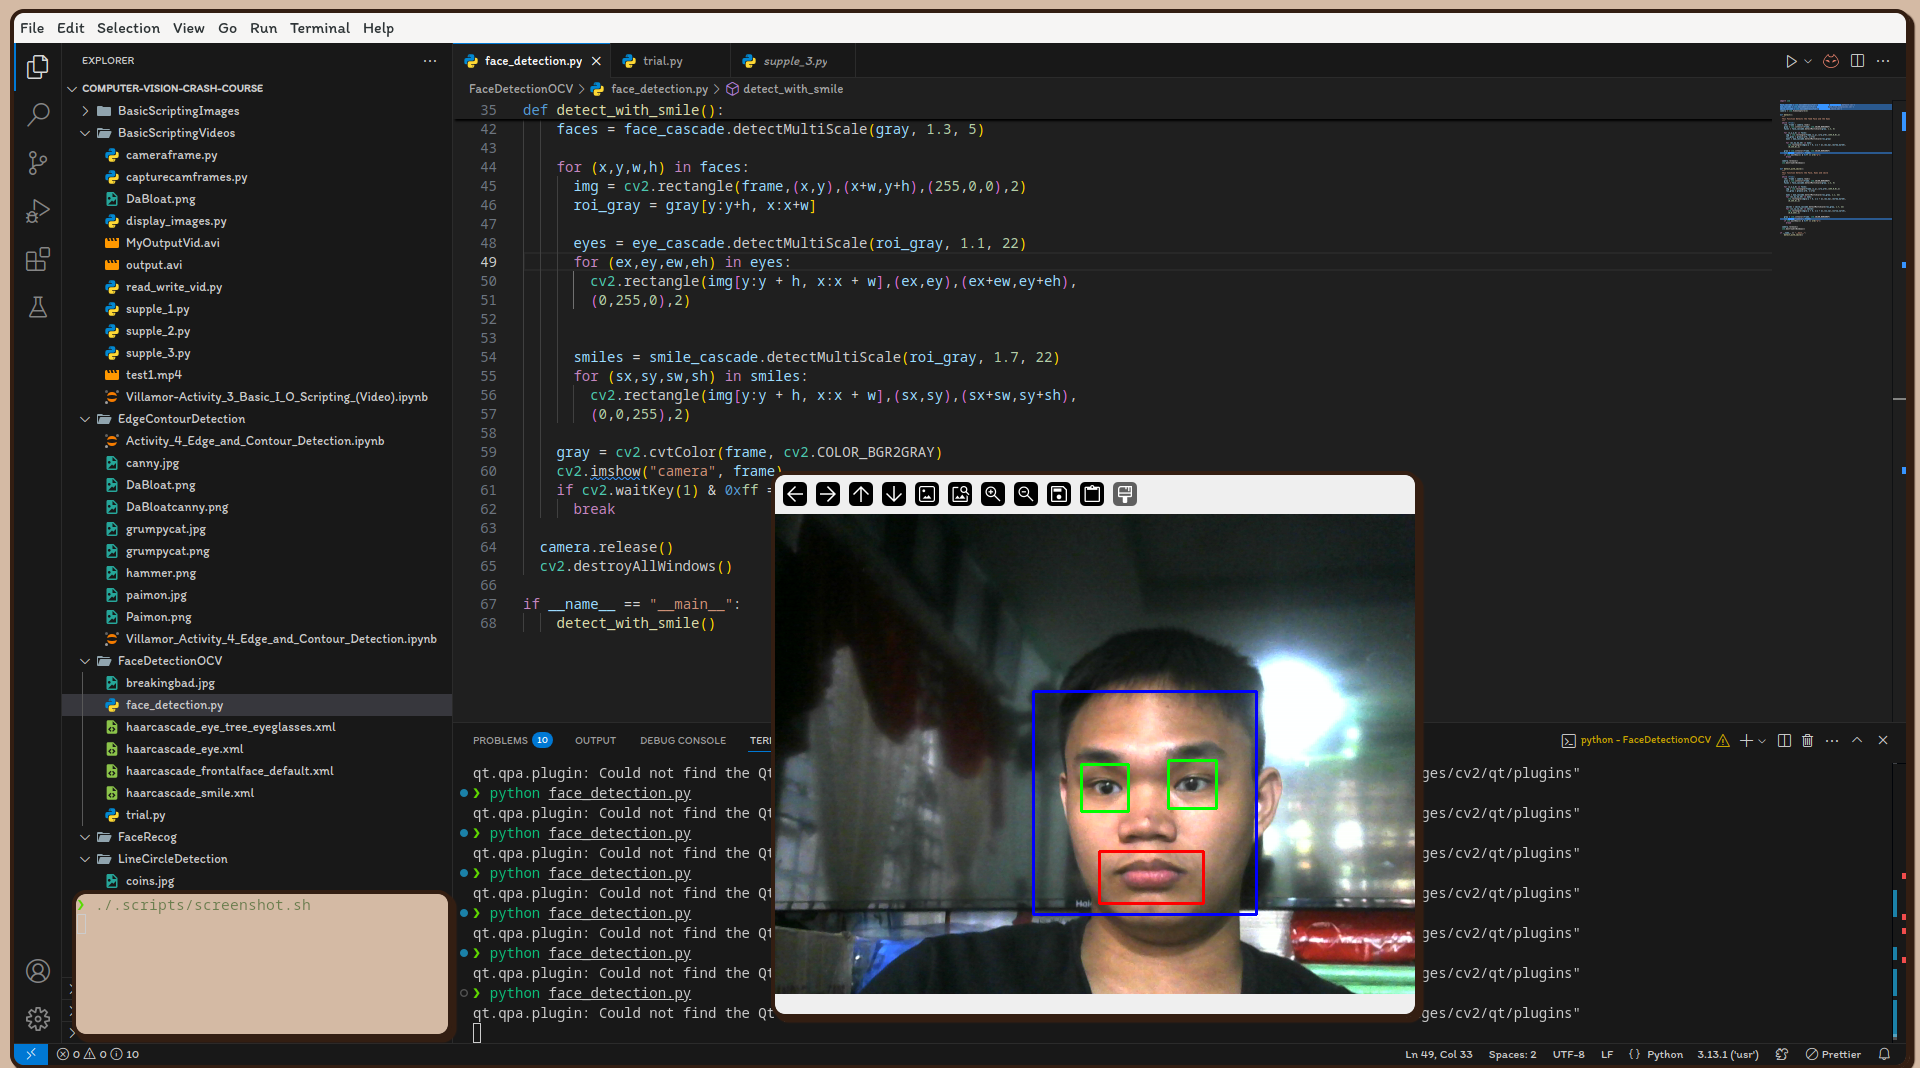

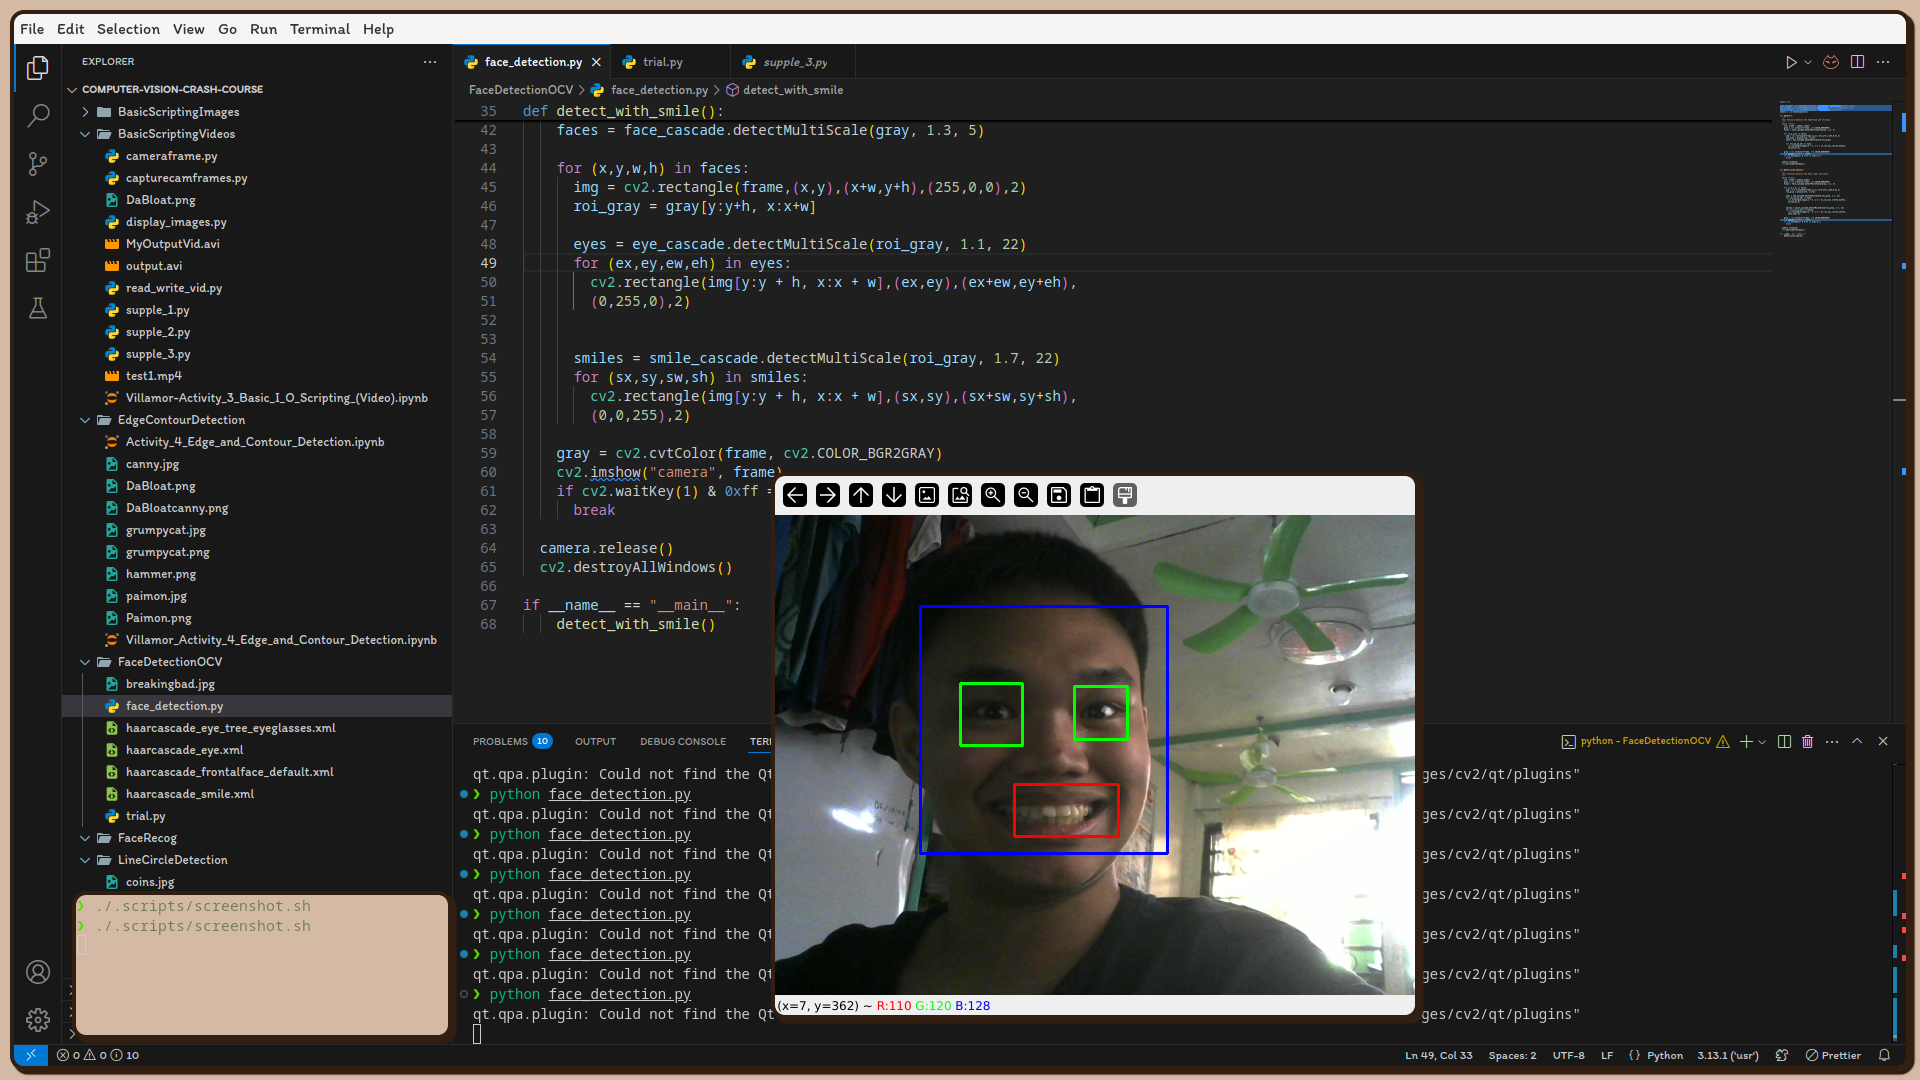

## 5. Summary, Conclusions and Lessons Learned

- in this activity, I learn to utilize the haar cascade algorithm to identify faces (and parts of it) in an image or realtime video feed. An Image is transformed to a grayscale version and fed to the algorithm while the realtime video feed is cut frame by frame and these frames are transformed to a grayscale version also. Haar-like features are efficient tools for detecting human features like faces, eyes, and other body parts by capturing intensity differences between adjacent regions in an image. These features are used in machine learning classifiers, such as the cascade classifier, to recognize patterns and identify specific human components. The method involves training on positive and negative samples, then applying the trained classifier to detect features in images.

In Python, OpenCV is commonly used for Haar-like feature detection. The cv2.CascadeClassifier in OpenCV allows for easy implementation of face, eye, and body part detection using pre-trained Haar cascade classifiers. OpenCV simplifies the process of training and applying Haar-like features for real-time detection, making it a go-to library for computer vision tasks.

By combining Haar-like features with OpenCV, developers can build efficient applications for human detection in images and video streams.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*